# 01_NBS_ Exploratory Data Analysis - EDA

## Purpose

The purpose of this notebook is to make some data exploration to undertand the data, and check the types of the data and the terminology we want to discover (e.g. dependencies, stationarity, differencing, specification, etc).

## Methodology
The approach used to made this EDA are: visualize time series data, patterns, additive and multiplicative time series, decomposition, stationarity and non-stationarity, testing stationarity, autocorrelation and partial autocorrelation.

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- Build a complete EDA for forecasting;
- Write the results of this analysis;
- Define the next step thinking in statical modeling or machine learning modeling.

## Results
If you look for the first graph, we can visualize that all the values are positive, so we can show on this on both sizes of the Y axis to emphasize the growth. The monthly time series follows a certain pattern every year.

Another important observation is if we look for the additive decomposition residuals it has some pattern left over. The other hand, the multiplicative decomposition residual looks quite random which is good.

## Suggested next steps
To do.

# Setup

## Library import
We import all the required Python libraries

In [3]:
# Data manipulation
import pandas as pd
import numpy as np
from dateutil.parser import parser

# Statistical
from statsmodels.tsa.seasonal import seasonal_decompose

# Data Statistical/Visualization
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

%matplotlib inline

## Local library import
We import all the required local libraries libraries

In [4]:
import os

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.


# Data load
We retrieve all the required data for the analysis.

In [5]:
data_path = "../data/AirPassengers.csv.xls"

df = pd.read_csv(data_path)
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Data processing

## Data Visualization

In [6]:
def plot_date(df: pd.DataFrame):
    """This function plot the distribution of the number of passengers correlational to the monthly reported_

    Args:
        df (pd.DataFrame): dataframe
    """

    fig = plt.figure(figsize=(20, 5), dpi=100)
    ax = fig.add_subplot(1,1,1)  
    plt.plot(df["Month"], df["#Passengers"], color="purple")
    plt.gca().set(title="Number of US Airline passengers from 1949 to 1960")
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.show()


def plot_two_side(df: pd.DataFrame):
    """This function plot the two sides of the Air passenger to verify if has a pattern of the monthly

    Args:
        df (pd.DataFrame): dataframe
    """
    fig, ax = plt.subplots(1, 1, figsize=(20, 5), dpi=200)
    plt.fill_between(x=df["Month"].values, y1=df["#Passengers"].values, y2=-df["#Passengers"].values,
                     alpha=0.5, linewidth=2, color="purple")
    plt.ylim(-800, 800)
    plt.title("Air passengers (Two side view)", fontsize=16)
    plt.hlines(y=0, xmin=np.min(df["Month"]), xmax=np.max(df["Month"]), linewidth=5)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.show()

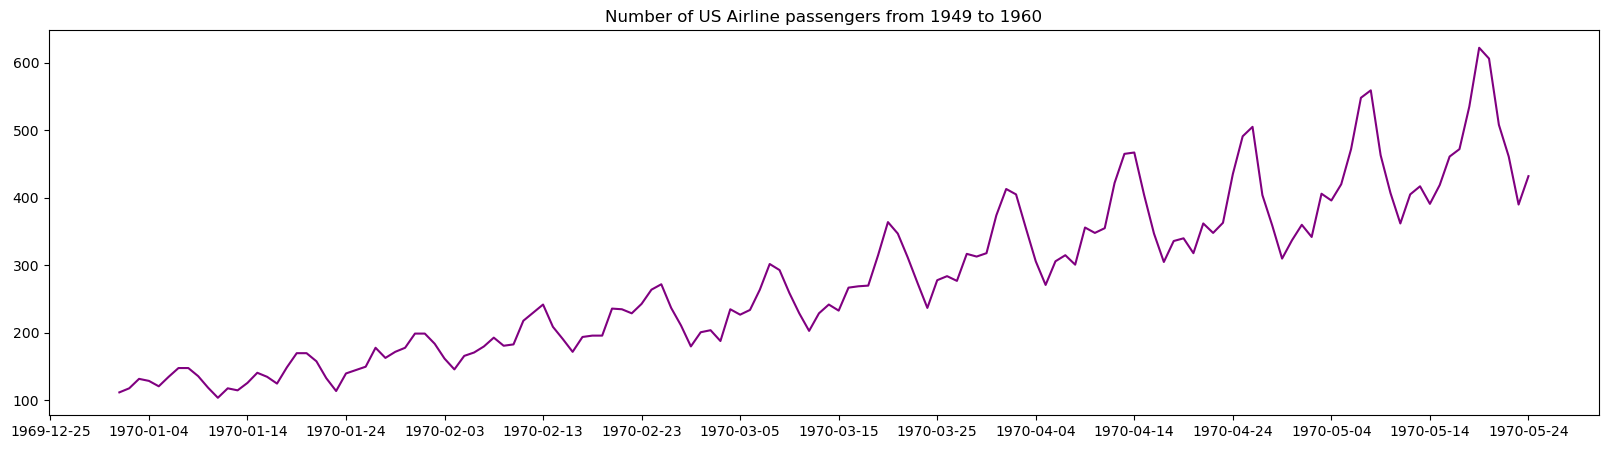

In [7]:
plot_date(df)

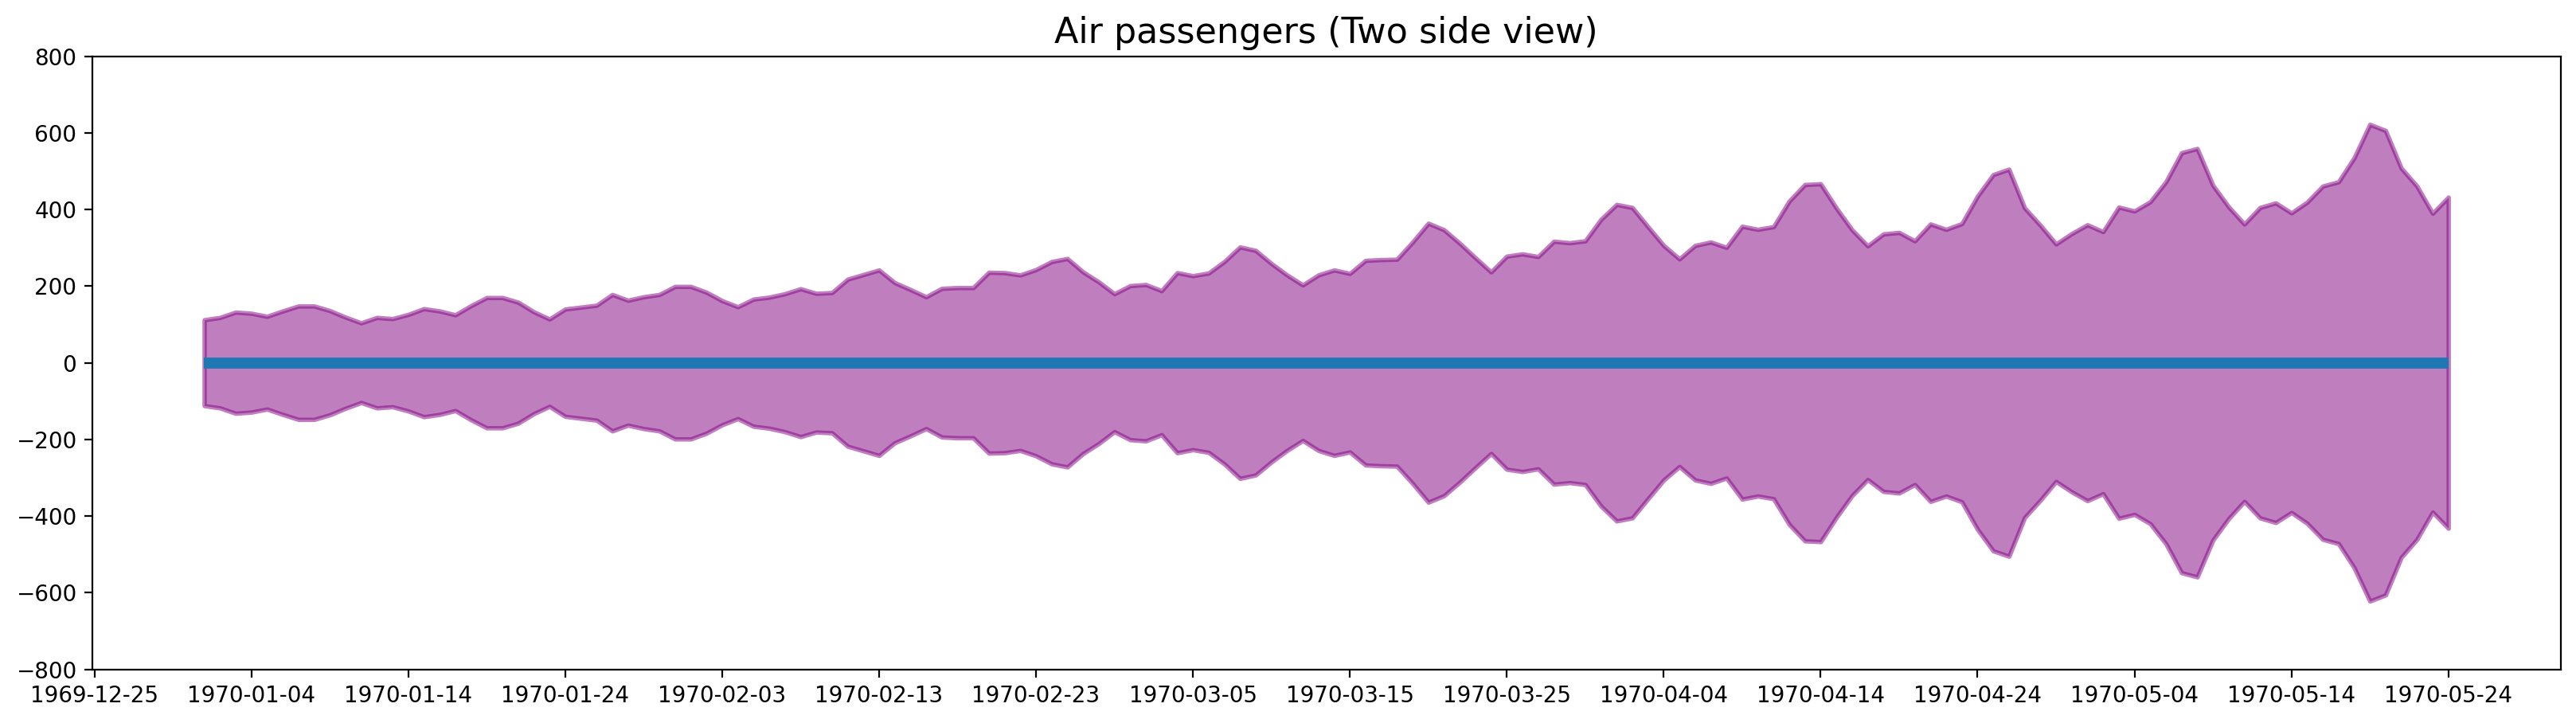

In [8]:
plot_two_side(df)

## Decomposition

In [19]:
def timeseries_decomposition(df: pd.DataFrame, period=30):
    """This function caculate the multiplicative and additive decomposition of the time series

    Args:
        df (pd.DataFrame): dataframe
        period (int, optional): period of the time series data. Defaults to 30.

    Returns:
        tuple: tuple contained the multiplicative and additive decomposition
    """
    mult_decomposition = seasonal_decompose(df["#Passengers"], model="multiplicative", period=period)
    add_decomposition = seasonal_decompose(df["#Passengers"], model="additive", period=period)
    return (mult_decomposition, add_decomposition)


def plot_decomposition(model_plot, title='', rect=[0, 0.05, 1, 0.95]):
    """This function plot the decomposition models

    Args:
        model_plot (statsmodels.tsa.seasonal.DecomposeResult): Seasonality plot model
        title (str, optional): Title of the plot. Defaults to ''.
        rect (list, optional): range of tight_layout. Defaults to [0, 0.05, 1, 0.95].
    """
    
    plt.rcParams.update({"figure.figsize": (20, 5)})
    model_plot.suptitle(title, fontsize=16)
    plt.tight_layout(rect=rect)
    plt.show()

In [13]:
mult_decomposition, add_decomposition = timeseries_decomposition(df)

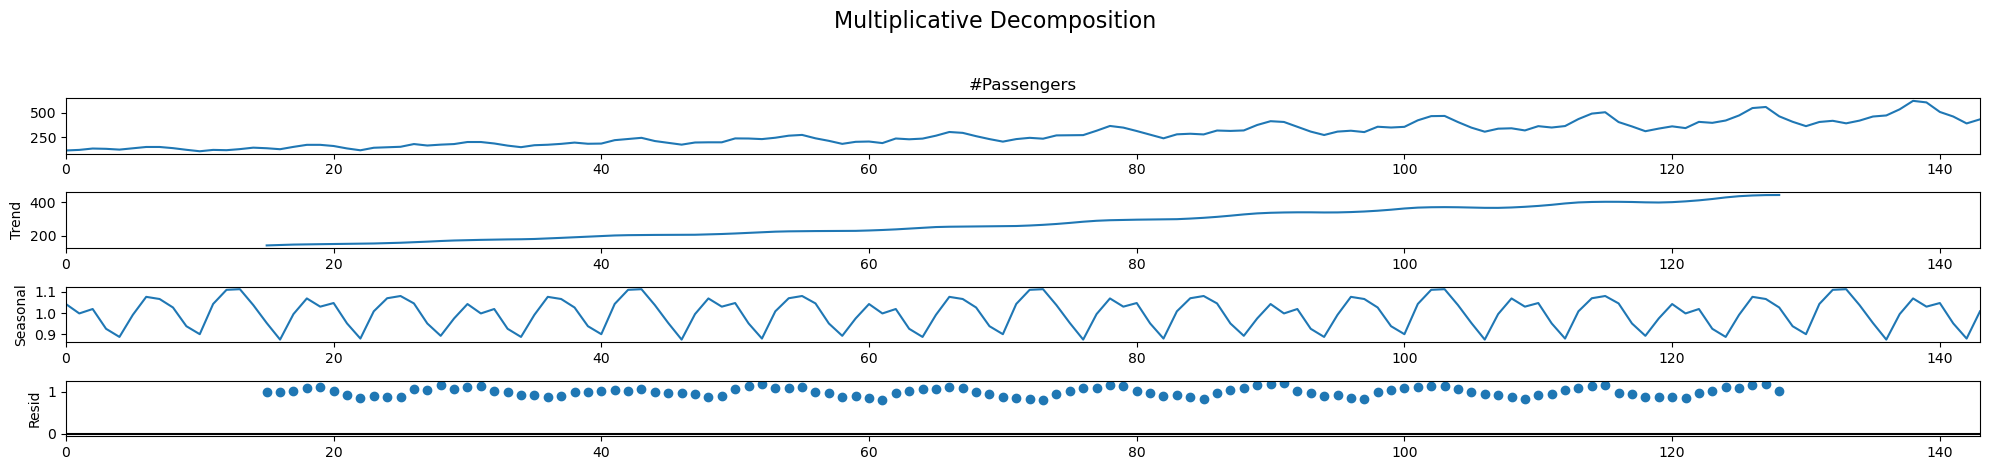

In [22]:
plot_decomposition(mult_decomposition.plot(), title="Multiplicative Decomposition")

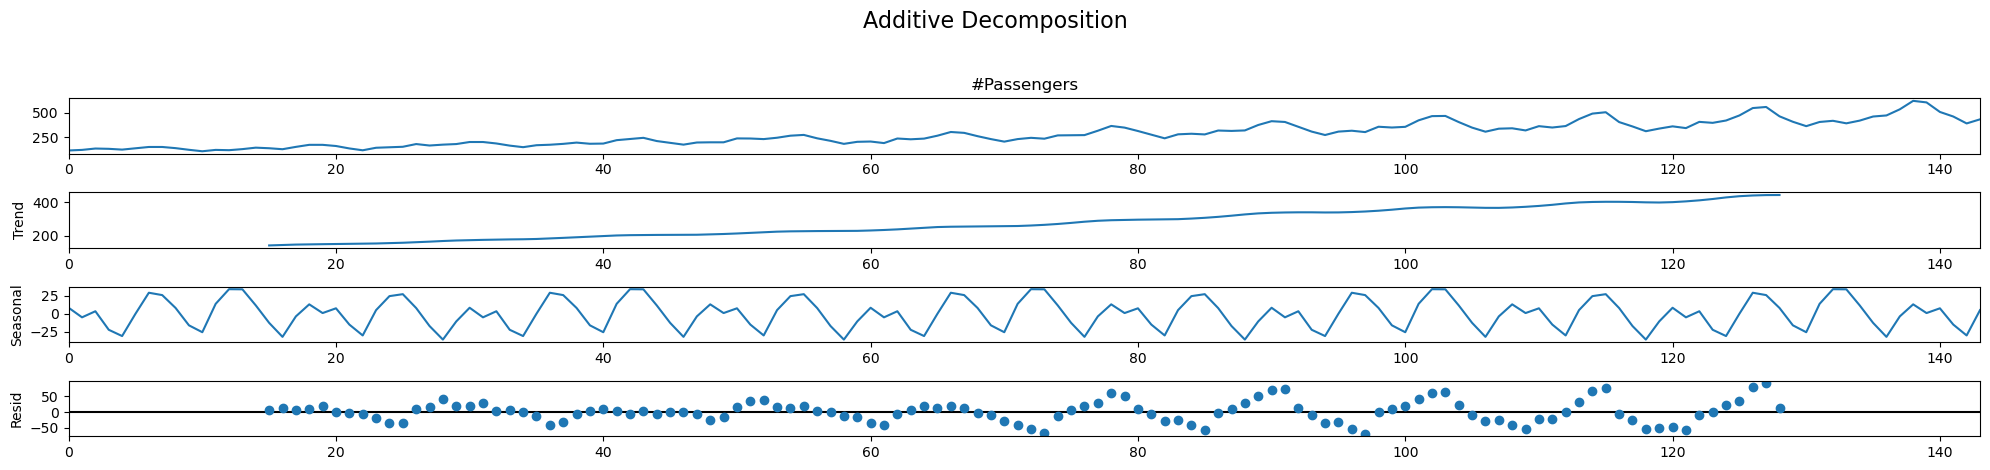

In [23]:
plot_decomposition(add_decomposition.plot(), title="Additive Decomposition")